![picture](https://drive.google.com/uc?id=1VsjviRojQFgeTYOtdQgyobRigMGGYd_A)

##Objectif :
Dans ce mini-projet, on s’intéresse au débruitage de signaux aléatoires en utilisant un filtre de Wiener de type RIF

#Partie préliminaire : 

![picture](https://drive.google.com/uc?id=1xyT25y5TfIoKri3SibB8VCPvFhL_B5ZH)

####Question 1 :

![picture](https://drive.google.com/uc?id=1SxWbujP6p-Ccn8Duoa8wS81-7qwMqbpu)

####Question 2 :

![picture](https://drive.google.com/uc?id=1f1qS3A-zxPrKNGf4DT-C8PwKOIwnB8lX)

####Question 3 :

![picture](https://drive.google.com/uc?id=1Z4rehxHRkr7wYgLuVvJQuKWgeqL76G29)

####Question 4 :

![picture](https://drive.google.com/uc?id=1icrfvwfuX6n-VVksT4UFbxx6MGr5muhX)

####Question 5 :

![picture](https://drive.google.com/uc?id=1Soz1nnZ2qloNtDTgg2iuVC12FBLJhTJE)

#Implémentation

Importation de bibliothèques necessaires

In [0]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import toeplitz
np.random.seed(1)

####Question 1 :

on va generer un signal de reference **'d'** de longueur 1000.

In [0]:
N=1000
wo=0.05*np.pi*0.5
fi=np.random.uniform(0,2*np.pi,N)
d=[np.sin(wo*i + fi[i-1]) for i in range(1,N+1)]

Text(0, 0.5, 'd')

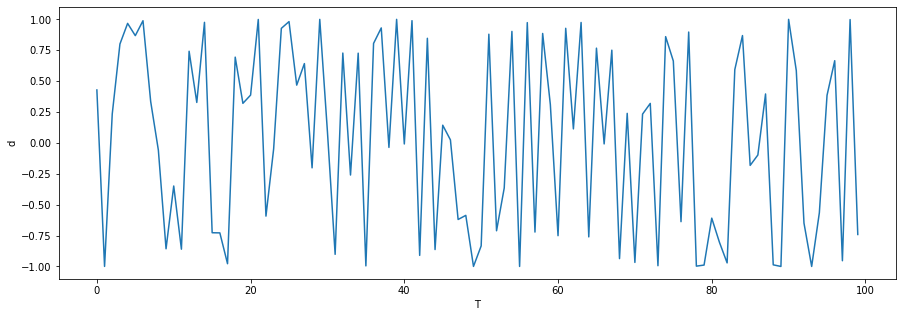

In [144]:
plt.figure(figsize=(15,5))
plt.plot(d[:100])
plt.xlabel('T')
plt.ylabel('d')

####Question 2 :

On va generer le signal bruité x(n) en additionnant le signal de réference d(n) avec un bruit gaussien centré u(n)

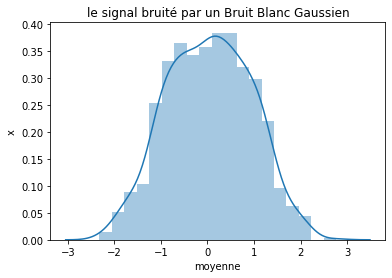

In [145]:
#Bruit gaussian blanc
#moyenne : 0
#ecart type : sqrt(0.3) 
#longeur : 10**3

sigma = np.sqrt(0.3)
m = 0
l = 10**3
u = np.random.normal(m,sigma,l)

x=d+u
sns.distplot(x)
plt.title('le signal bruité par un Bruit Blanc Gaussien')
plt.xlabel('moyenne')
plt.ylabel('x')
plt.show()

####Question 3 :

On va calculer le h_opt du filtre de Wiener pour un L = 3

In [146]:
R= np.correlate(x,x,mode='full')
P= np.correlate(x,d,mode='full')
for i in range(3):
  mx = R.max()
  R[999 + i] = R[999 + i]/(999-i)
  P[999 + i] = P[999 + i]/(999-i)

R=toeplitz(R[999:1002])
R_inv= np.linalg.inv(R)
P=P[999:1002]

h_opt=np.dot(R_inv,P)
print(h_opt)

[0.61081461 0.00284496 0.00447254]


####Question 4 :


on va générer la sortie du filtre de Wiener 

In [0]:
d_hat = np.convolve(x, h_opt)

Text(0, 0.5, 'd_hat')

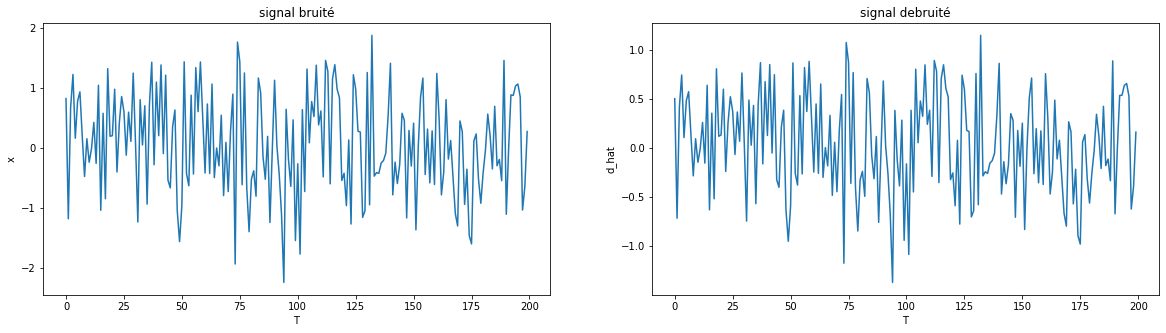

In [148]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(x[:200])
plt.title('signal bruité')
plt.xlabel('T')
plt.ylabel('x')
plt.subplot(1,2,2)
plt.plot(d_hat[:200])
plt.title('signal debruité')
plt.xlabel('T')
plt.ylabel('d_hat')

Après application du filtre de Wiener on a visualisé les deux signaux bruité et débruité.
On voit la disparition d'un peu de bruit puisque l'ordre de filtre est faible:  L = 3.

On va voir l'amélioration de ce processus en augmentant le L.

####Question 5 :

on va afficher le signal de référence, celui bruité et le signal ainsi débruité

Text(0.5, 0, 'T')

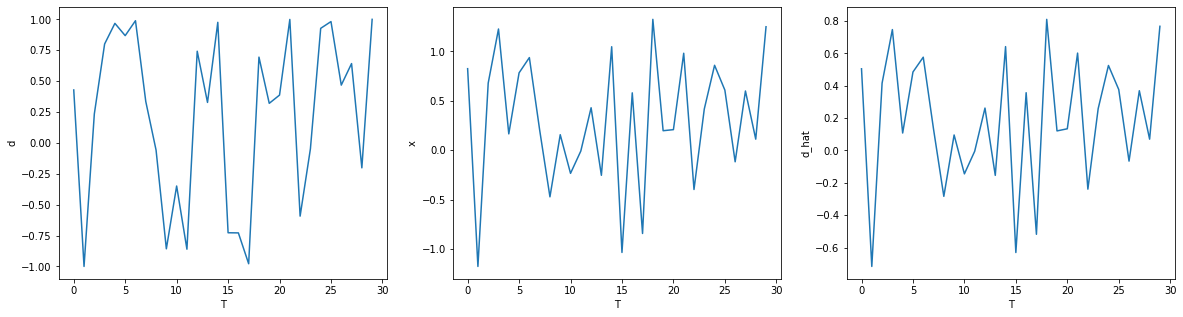

In [149]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(d[:30])
plt.ylabel('d')
plt.xlabel('T')

plt.subplot(1,3,2)
plt.plot(x[:30])
plt.ylabel('x')
plt.xlabel('T')
plt.subplot(1,3,3)
plt.plot(d_hat[:30])
plt.ylabel('d_hat')
plt.xlabel('T')


Il est clair que le signal bruité n'a pas subi beaucoup d'amélioration en appliquant le filtre puisque l'ordre L est faible.

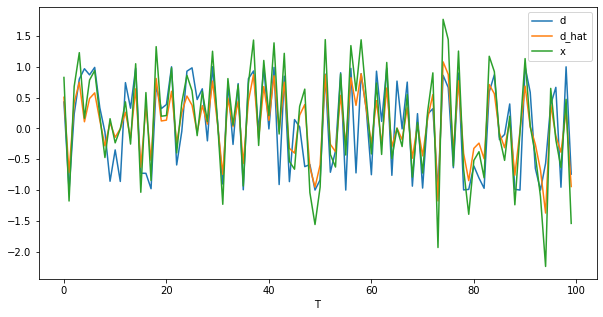

In [150]:
plt.figure(figsize=(10,5))
plt.plot(d[:100],label='d')
plt.xlabel('T')

plt.plot(d_hat[:100],label='d_hat')
plt.plot(x[:100],label='x')
plt.legend()

####Question 6 :

on va déterminer ainsi les valeurs des RSB avant et après débruitage ainsi que la valeur de 𝐽𝑚𝑖n

* RSB avant débruitage 

In [151]:
u = np.array(u)
d = np.array(d)
RSB = 10*np.log10((d.var() + d.mean()**2)/(u.var()+ u.mean()**2))
print(RSB)

1.999710726783048


* RSB après débruitage 

In [152]:
RSB_d = 10*np.log10((np.convolve(d, h_opt).var() + np.convolve(d, h_opt).mean()**2)/(np.convolve(u, h_opt).var() + np.convolve(u, h_opt).mean()**2))
print(RSB_d)

2.0046251418937215


RQ: RSB augmente legerement apres débruitage et ceci confirme que le filtre de Wiener pour un ordre L = 3 n'est pas très performant.

* calcule de J min

In [153]:
D= np.correlate(d,d,mode='full')/999
Jmin = D[999] - np.dot(h_opt.T, P)
print(Jmin)

0.1874799680490819


Le Jmin est proche de 0 et ceci montre que le signal débruité et proche de signal de réference.

Autrement dit, l'erreur quadratique moyenne minimal est faible.

####Question 7 :

on va visualiser les variations de 𝑅𝑆𝐵′ et 𝐽𝑚𝑖𝑛 en fonction de 𝐿.

In [0]:
def f(L):
  R= np.correlate(x,x,mode='full')
  P= np.correlate(x,d,mode='full')
  for i in range(L):
    mx = R.max()
    R[999 + i] = R[999 + i]/(999-i)
    P[999 + i] = P[999 + i]/(999-i)

  R=toeplitz(R[999:999 + L])
  R_inv= np.linalg.inv(R)
  P=P[999:999 + L]

  h_opt=np.dot(R_inv,P)

  RSB_d = 10*np.log10((np.convolve(d, h_opt).var() + np.convolve(d, h_opt).mean()**2)/(np.convolve(u, h_opt).var() + np.convolve(u, h_opt).mean()**2))
  
  D= np.correlate(d,d,mode='full')/999
  Jmin = D[999] - np.dot(h_opt.T, P)
  return RSB_d,Jmin


In [0]:
RSB_d = []
Jmin = []
for L in range(3, 40):
  rsb_d,jmin=f(L)
  RSB_d.append(rsb_d)
  Jmin.append(jmin)


Text(0.5, 0, 'L')

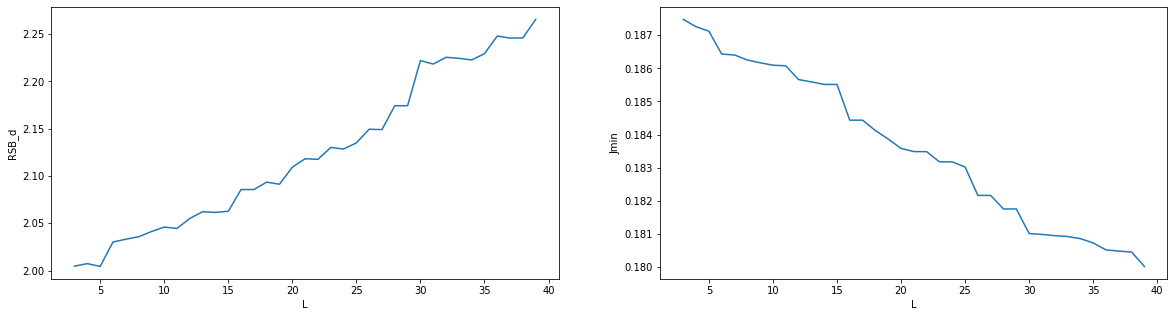

In [156]:
T = range(3, 40)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(T, RSB_d)
plt.ylabel('RSB_d')
plt.xlabel('L')

plt.subplot(1,2,2)
plt.plot(T, Jmin)
plt.ylabel('Jmin')
plt.xlabel('L')


En augmentant l'ordre du filtre L, on remarque l'augmentation de RSB' et diminution de Jmin.

Ceci était prévu : donc le rapport signal sur bruit augmente avec l'ordre et cela montre que le fitre à haute ordre est plus performant pour le débruitage

Meme chose pour l'EQM : le filtre devient plus performant et par la suite les signaux débruité et de reférence sont plus proche.

####Question 8 :

on va reprendre les etapes precedentes avec un signal audio.

In [157]:
!pip install soundfile

In [0]:
np.random.seed(2)
import soundfile as sf
d_audio, Fs = sf.read('jonasz_lucille_extrait.wav')

In [159]:
print('La longueur du fichier est l = ', len(d_audio))

La longueur du fichier est l =  1450001


In [0]:
d_audio = d_audio[500000:514001]
lon = 14000

On a chosit de travailler sur une partie du signal de longeur 14001 pour gagner du temps.

In [161]:
print('La fréquence d echantillonnage est Fs = ',Fs)

La fréquence d echantillonnage est Fs =  44100


Text(0.5, 0, 'T')

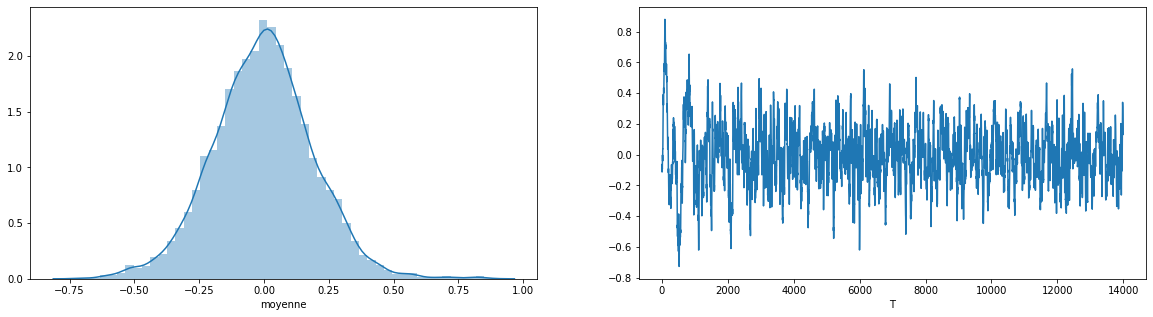

In [162]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(d_audio)
plt.xlabel('moyenne')

plt.subplot(1,2,2)
plt.plot(d_audio)
plt.xlabel('T')


######Question 8_2:

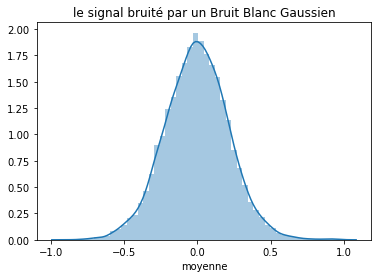

In [163]:
#Bruit gaussian blanc
#moyenne : 0
#ecart type : sqrt(0.01) 
#longeur : 10**3

sigma = np.sqrt(0.01)
m = 0
l = len(d_audio)
u = np.random.normal(m,sigma,l)
x_audio=d_audio+u
sns.distplot(x_audio)
plt.title('le signal bruité par un Bruit Blanc Gaussien')
plt.xlabel('moyenne')

plt.show()

On a generé le signal bruité x_audio(n) en additionnant le signal de réference d_audio(n) avec un bruit gaussien centré u(n)


#####Question 8_3 :

In [164]:
R= np.correlate(x_audio,x_audio,mode='full')
P= np.correlate(x_audio,d_audio,mode='full')

R=toeplitz(R[lon:lon + 3])
R_inv= np.linalg.inv(R)
P=P[lon:lon + 3]

h_opt=np.dot(R_inv,P)
h_opt

array([0.35057822, 0.29929166, 0.26315525])

On a calculé le h_opt pour le filtre de Wiener pour un L = 3

#####Question 8_4 :

In [0]:
dhat_audio=np.convolve(x_audio,h_opt)

Text(0.5, 0, 'T')

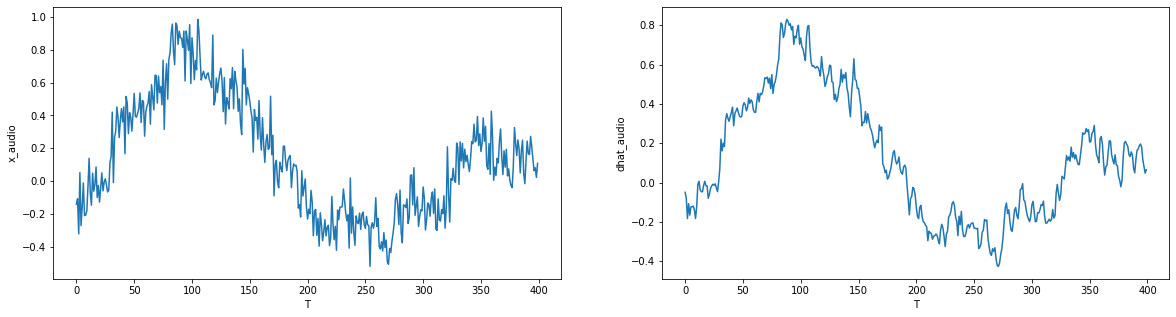

In [166]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(x_audio[:400])
plt.ylabel('x_audio')
plt.xlabel('T')

plt.subplot(1,2,2)
plt.plot(dhat_audio[:400])
plt.ylabel('dhat_audio')
plt.xlabel('T')


Après application du filtre de Wiener on a visualisé les deux signaux bruité et débruité. On voit la disparition d'un peu de bruit puisque l'ordre de filtre est faible: L = 3.

On va voir l'amélioration de ce processus en augmentant le L.

#####Question 8_5:

Text(0.5, 0, 'T')

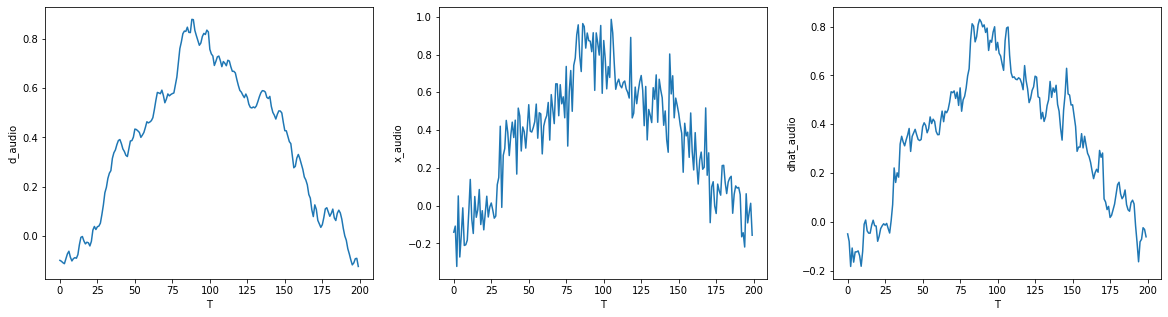

In [167]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(d_audio[:200])
plt.ylabel('d_audio')
plt.xlabel('T')

plt.subplot(1,3,2)
plt.plot(x_audio[:200])
plt.ylabel('x_audio')
plt.xlabel('T')

plt.subplot(1,3,3)
plt.plot(dhat_audio[:200])
plt.ylabel('dhat_audio')
plt.xlabel('T')


On voit que le signal débruité s'approche du signal du reférence.

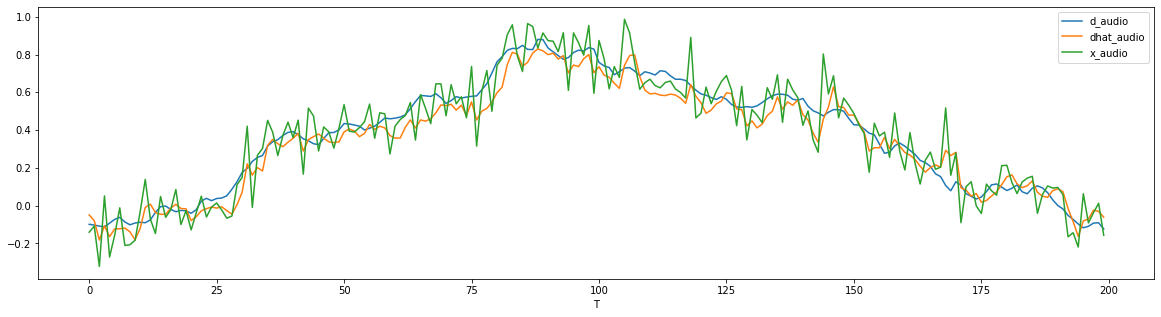

In [168]:
plt.figure(figsize=(20,5))
plt.plot(d_audio[:200],label='d_audio')
plt.plot(dhat_audio[:200],label='dhat_audio')
plt.plot(x_audio[:200],label='x_audio')
plt.xlabel('T')

plt.legend()

Détermination ainsi des valeurs des RSB avant et après débruitage ainsi que la valeur de
𝐽𝑚𝑖n

#####Question 8_6:

In [169]:
u = np.array(u)
d_audio = np.array(d_audio)

RSB = 10*np.log10((d_audio.var() + d_audio.mean()**2)/(u.var()+ u.mean()**2))
print(RSB)

5.742453902604301


In [170]:
RSB_d = 10*np.log10((np.convolve(d_audio, h_opt).var() + np.convolve(d_audio, h_opt).mean()**2)/(np.convolve(u, h_opt).var() + np.convolve(u, h_opt).mean()**2))
print(RSB_d)

10.403670640890732


Après passage par le filtre de Wiener le rapport signal sur bruit à augmenter et ceci est prévu.

On voit voir ensuite, l'influence de l'ordre L sur ce facteur.

In [171]:
D= np.correlate(d_audio,d_audio,mode='full')
Jmin = D[lon] - np.dot(h_opt.T, P)
print(Jmin)

49.20845889570512


Le Jmin n'est pas proche de 0 est ceci montre que les deux signaux débruité et de réference ne  sont pas proches.

On voit voir l'influence de L sur Jmin par la suite.

#####Question 8_7:

In [0]:
def g(L):
  R= np.correlate(x_audio,x_audio,mode='full')
  P= np.correlate(x_audio,d_audio,mode='full')

  R=toeplitz(R[lon:lon + L])
  R_inv= np.linalg.inv(R)
  P=P[lon:lon + L]

  h_opt=np.dot(R_inv,P)

  RSB_d = 10*np.log10((np.convolve(d_audio, h_opt).var() + np.convolve(d_audio, h_opt).mean()**2)/(np.convolve(u, h_opt).var() + np.convolve(u, h_opt).mean()**2))
  
  D= np.correlate(d_audio,d_audio,mode='full')
  Jmin = D[lon] - np.dot(h_opt.T, P)
  return RSB_d,Jmin



In [0]:
RSB_d = []
Jmin = []
for L in range(10, 15):
  rsb_d,jmin=g(L)
  RSB_d.append(rsb_d)
  Jmin.append(jmin)

Text(0.5, 0, 'T')

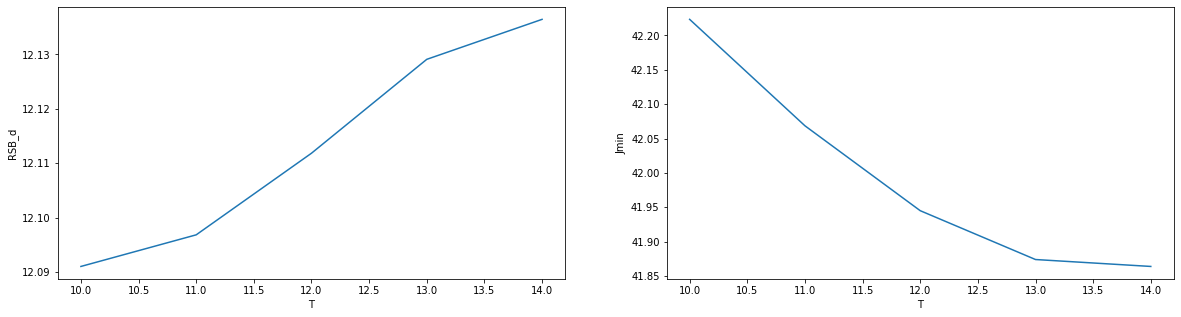

In [174]:
T = range(10, 15)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(T, RSB_d)
plt.ylabel('RSB_d')
plt.xlabel('T')

plt.subplot(1,2,2)
plt.plot(T, Jmin)
plt.ylabel('Jmin')
plt.xlabel('T')


Comme prévu, en augmentant l'ordre L du filtre le RSB' augmente et le Jmin chute. Ceci montre que le filtre devient de plus en plus performant.

####Determination de nombre d'échantillons pour une durée 3ms

In [175]:
NE = (3/1000)*Fs
print(NE)

132.3


Donc on va effectuer un fénetrage par une fénetre de taille 132.

####Question 9:

In [176]:
Dhat_audio = np.array([])
H_opt_audio = np.array([])
P_audio = np.array([])
J = []
rsb = []
from tqdm import tqdm
for i in tqdm(range(0, (len(x_audio)//132)*132, 132)):
  R= np.correlate(x_audio[i:i+132],x_audio[i:i+132],mode='full')
  P= np.correlate(x_audio[i:i+132],d_audio[i:i+132],mode='full')
  for i in range(3):
    R[131 + i] = R[131 + i]
    P[131 + i] = P[131 + i]
    
  R=toeplitz(R[131:134])
  R_inv= np.linalg.inv(R)
  P=P[131:134]
  

  H_opt=np.dot(R_inv,P)
  Dhat_fenetre=np.convolve(x_audio[i:i+132],H_opt)

  D= np.correlate(Dhat_fenetre,Dhat_fenetre,mode='full')
  Jmin = D[131] - np.dot(H_opt.T, P)
  J.append(Jmin)

  RSB_d_p = 10*np.log10((np.convolve(Dhat_fenetre, H_opt).var() + np.convolve(Dhat_fenetre, H_opt).mean()**2)/(np.convolve(u, H_opt).var() + np.convolve(u, H_opt).mean()**2))
  rsb.append(RSB_d_p)

  Dhat_audio = np.concatenate((Dhat_audio,Dhat_fenetre), axis=None)
  H_opt_audio = np.concatenate((H_opt_audio,H_opt), axis=None)
  P_audio = np.concatenate((P_audio,P), axis=None)

RSB_d = 10*np.log10((np.convolve(Dhat_audio, H_opt_audio).var() + np.convolve(Dhat_audio, H_opt_audio).mean()**2)/(np.convolve(u, H_opt_audio).var() + np.convolve(u, H_opt_audio).mean()**2))




100%|██████████| 106/106 [00:00<00:00, 1840.86it/s]


In [177]:
print('La variance de RSB_d par fenetre est ',(np.array(rsb).var()))

print('RSB_d  = ',sum(rsb)/len(rsb))
print('Jmin  = ',sum(J)/len(J))

La variance de RSB_d par fenetre est  0.4695214089233991
RSB_d  =  17.963730400090306
Jmin  =  25.29695471902209


Par la méthode de fénetrage on a obtenu un RSB' elevé et un Jmin très réduit. Ceci montre que cette approche a rendu le processus de débruitage très éfficace.

Text(0, 0.5, 'Dhat_audio')

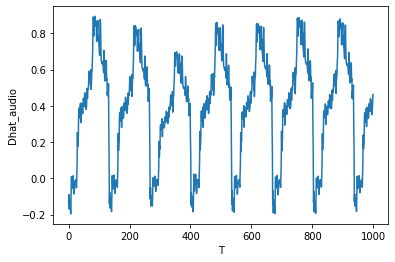

In [178]:
plt.plot(Dhat_audio[:1000])
plt.xlabel('T')
plt.ylabel('Dhat_audio')

#####Question 10 :

Après avoir éffectuer la méthode de fénetrage, on peut constater que cette dernière garantit un rapport signal sur bruit plus important que la méthode sans fénetrage et un Erreur quadratique moyenne minimal très réduit par rapport à la première méthode.

Ceci montre que la méthode de fénetrage est très efficace pour le débruitage par filtre à Wiener.